In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [ ]:
RUN_ID = 6128

df_conditions = pd.read_csv(f'./results/{RUN_ID}/conditions.csv')
df_conditions_melted = df_conditions.melt(id_vars='generation', var_name='condition', value_name='value')

df_actions = pd.read_csv(f'./results/{RUN_ID}/actions.csv')
df_actions_melted = df_actions.melt(id_vars='generation', var_name='action', value_name='value')

df_performance = pd.read_csv(f'./results/{RUN_ID}/performance.csv')
df_performance_melted = df_performance.melt(id_vars='generation', var_name='metric', value_name='value')

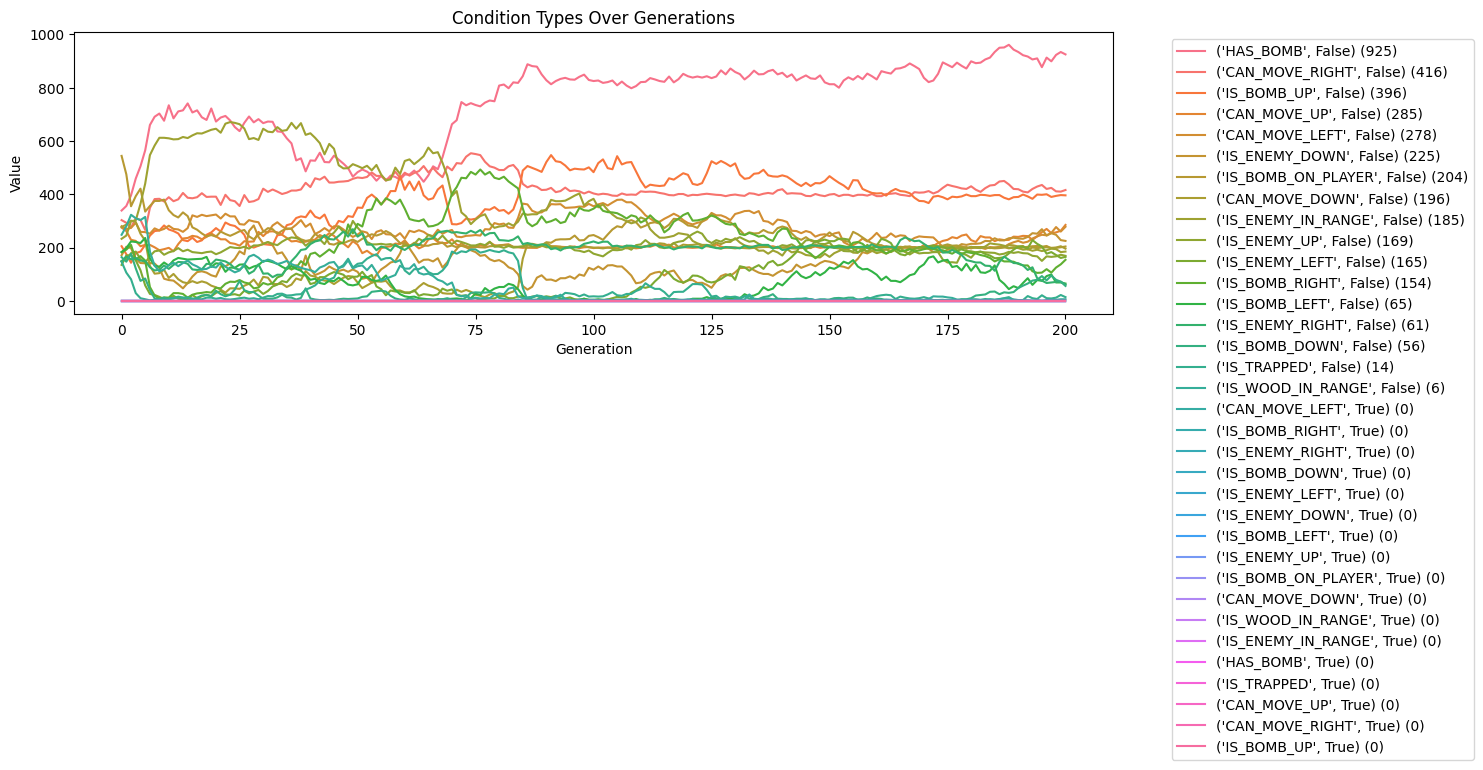

Final Generation conditions:
('HAS_BOMB', False)             925
('CAN_MOVE_RIGHT', False)       416
('IS_BOMB_UP', False)           396
('CAN_MOVE_UP', False)          285
('CAN_MOVE_LEFT', False)        278
('IS_ENEMY_DOWN', False)        225
('IS_BOMB_ON_PLAYER', False)    204
('CAN_MOVE_DOWN', False)        196
('IS_ENEMY_IN_RANGE', False)    185
('IS_ENEMY_UP', False)          169
('IS_ENEMY_LEFT', False)        165
('IS_BOMB_RIGHT', False)        154
('IS_BOMB_LEFT', False)          65
('IS_ENEMY_RIGHT', False)        61
('IS_BOMB_DOWN', False)          56
('IS_TRAPPED', False)            14
('IS_WOOD_IN_RANGE', False)       6
('CAN_MOVE_LEFT', True)           0
('IS_BOMB_RIGHT', True)           0
('IS_ENEMY_RIGHT', True)          0
('IS_BOMB_DOWN', True)            0
('IS_ENEMY_LEFT', True)           0
('IS_ENEMY_DOWN', True)           0
('IS_BOMB_LEFT', True)            0
('IS_ENEMY_UP', True)             0
('IS_BOMB_ON_PLAYER', True)       0
('CAN_MOVE_DOWN', True)           0

In [3]:
fig_conditions, ax_conditions = plt.subplots(figsize=(15, 6)) # Use distinct fig/ax names

final_generation_conditions_df = df_conditions['generation'].max()

# Get the conditions for the final generation, sorted by their 'value'
final_generation_conditions_values = df_conditions[df_conditions['generation'] == final_generation_conditions_df].iloc[0].drop('generation')

# Order conditions based on their values in the final generation, from most to least
ordered_conditions = final_generation_conditions_values.sort_values(ascending=False).index.tolist()

# Convert 'condition' column to a categorical type with the desired order
df_conditions_melted['condition'] = pd.Categorical(df_conditions_melted['condition'], categories=ordered_conditions, ordered=True)

# Sort the DataFrame by the 'condition' column to ensure correct plotting order for legend
df_conditions_melted_sorted = df_conditions_melted.sort_values(by='condition')

sns.lineplot(data=df_conditions_melted_sorted, x='generation', y='value', hue='condition', ax=ax_conditions)
ax_conditions.set_title("Condition Types Over Generations")
ax_conditions.set_xlabel("Generation")
ax_conditions.set_ylabel("Value") # Added y-label for clarity

# Get current legend handles and labels
handles_act, labels_act = ax_conditions.get_legend_handles_labels()

# Create new labels with final generation values
new_labels_act = []
for label in labels_act:
    # 'label' here is expected to be a plain string condition name
    value_at_final = final_generation_conditions_values.get(label, 'N/A')
    
    # Check if value_at_final is 'N/A' (a string) before trying to format it as a number
    if value_at_final == 'N/A':
        new_labels_act.append(f"{label} ({value_at_final})")
    else:
        new_labels_act.append(f"{label} ({value_at_final:.0f})")

# Update the legend with new labels and correct position
ax_conditions.legend(handles=handles_act, labels=new_labels_act, bbox_to_anchor=(1.05, 1), loc='upper left')
fig_conditions.tight_layout()
plt.show()

# Print final generation conditions
print("Final Generation conditions:")
print(final_generation_conditions_values.sort_values(ascending=False).to_string())

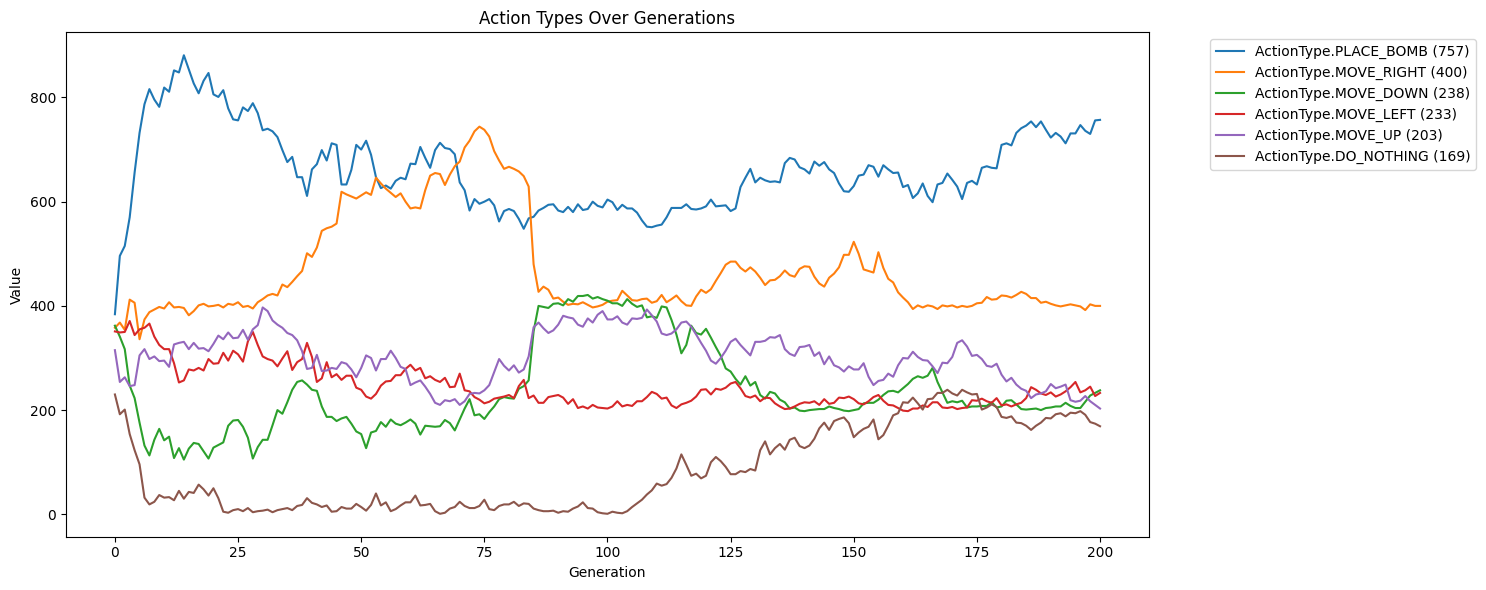

Final Generation Actions:
ActionType.PLACE_BOMB    757
ActionType.MOVE_RIGHT    400
ActionType.MOVE_DOWN     238
ActionType.MOVE_LEFT     233
ActionType.MOVE_UP       203
ActionType.DO_NOTHING    169


In [4]:
fig_actions, ax_actions = plt.subplots(figsize=(15, 6)) # Use distinct fig/ax names

final_generation_actions_df = df_actions['generation'].max()

# Get the actions for the final generation, sorted by their 'value'
final_generation_actions_values = df_actions[df_actions['generation'] == final_generation_actions_df].iloc[0].drop('generation')

# Order actions based on their values in the final generation, from most to least
ordered_actions = final_generation_actions_values.sort_values(ascending=False).index.tolist()

# Convert 'action' column to a categorical type with the desired order
df_actions_melted['action'] = pd.Categorical(df_actions_melted['action'], categories=ordered_actions, ordered=True)

# Sort the DataFrame by the 'action' column to ensure correct plotting order for legend
df_actions_melted_sorted = df_actions_melted.sort_values(by='action')

sns.lineplot(data=df_actions_melted_sorted, x='generation', y='value', hue='action', ax=ax_actions)
ax_actions.set_title("Action Types Over Generations")
ax_actions.set_xlabel("Generation")
ax_actions.set_ylabel("Value") # Added y-label for clarity

# Get current legend handles and labels
handles_act, labels_act = ax_actions.get_legend_handles_labels()

# Create new labels with final generation values
new_labels_act = []
for label in labels_act:
    # 'label' here is expected to be a plain string action name
    value_at_final = final_generation_actions_values.get(label, 'N/A')
    
    # Check if value_at_final is 'N/A' (a string) before trying to format it as a number
    if value_at_final == 'N/A':
        new_labels_act.append(f"{label} ({value_at_final})")
    else:
        new_labels_act.append(f"{label} ({value_at_final:.0f})")

# Update the legend with new labels and correct position
ax_actions.legend(handles=handles_act, labels=new_labels_act, bbox_to_anchor=(1.05, 1), loc='upper left')
fig_actions.tight_layout()
plt.show()

# Print final generation actions
print("Final Generation Actions:")
print(final_generation_actions_values.sort_values(ascending=False).to_string())

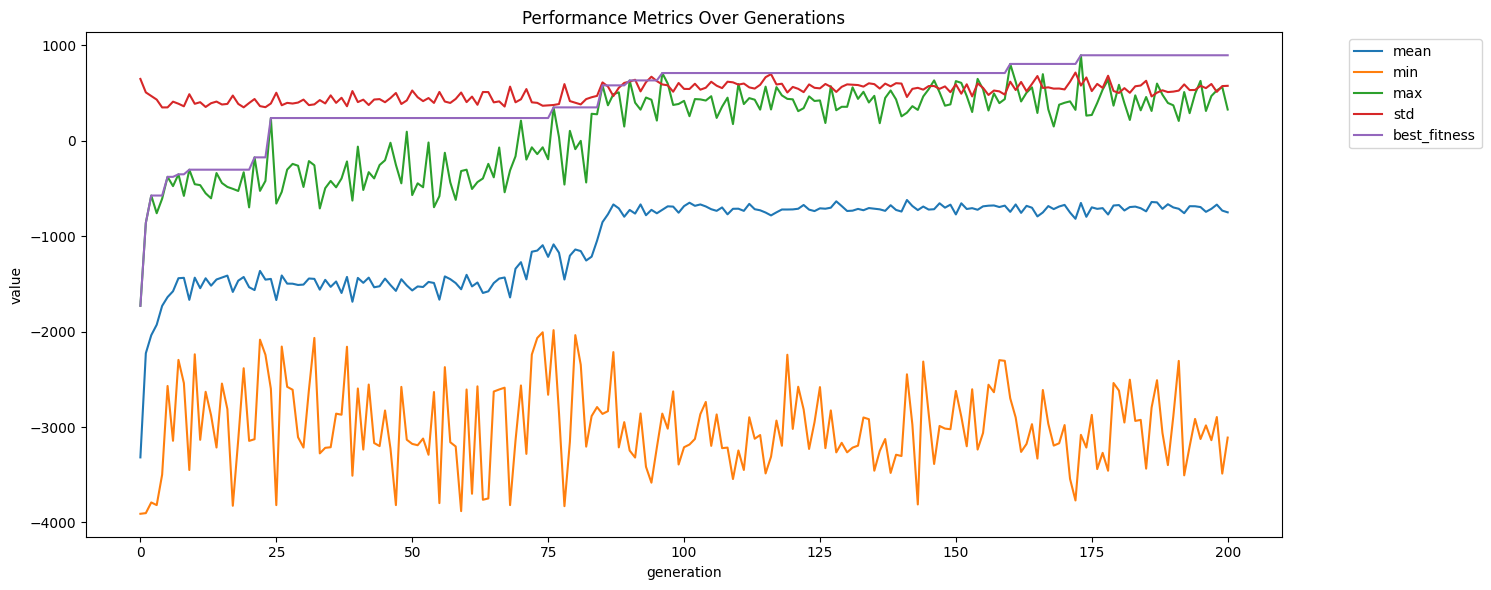

Final Generation Performance:
best_fitness     897.630
std              577.217
max              328.640
mean            -749.300
min            -3110.960


In [5]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_performance_melted, x='generation', y='value', hue='metric')
plt.title("Performance Metrics Over Generations")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
final_generation = df_performance['generation'].max()
final_generation_performance = df_performance[df_performance['generation'] == final_generation].iloc[0].drop('generation')
print("Final Generation Performance:")
print(final_generation_performance.sort_values(ascending=False).to_string())